In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

USvideo=pd.read_csv('USvideos.csv')

In [2]:
USvideo.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [8]:
import json

USvideo_cat_json = None

with open('US_category_id.json') as f:
    USvideo_cat_json = json.load(f)

USvideo_cat = {}

for item in USvideo_cat_json["items"]:
    USvideo_cat[int(item["id"])] = item["snippet"]["title"]

In [9]:
USvideo_cat

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [11]:
for i, row in USvideo.iterrows():
    USvideo.at[i,'category'] = USvideo_cat[USvideo.at[i,'category_id']]

In [12]:
print(USvideo.head())

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [13]:
for i, row in USvideo.iterrows():
    USvideo.at[i,'view_per_like'] = USvideo.at[i,'views']/USvideo.at[i,'likes']

<ipython-input-13-8947024ac604>:2: RuntimeWarning: divide by zero encountered in long_scalars
  USvideo.at[i,'view_per_like'] = USvideo.at[i,'views']/USvideo.at[i,'likes']


In [16]:
cat_view_like = pd.DataFrame({
    'category': USvideo['category'],
    'likes': USvideo['likes'],
    'views': USvideo['views'],
    'view_per_like': USvideo['view_per_like']
})

/Users/agnessharan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


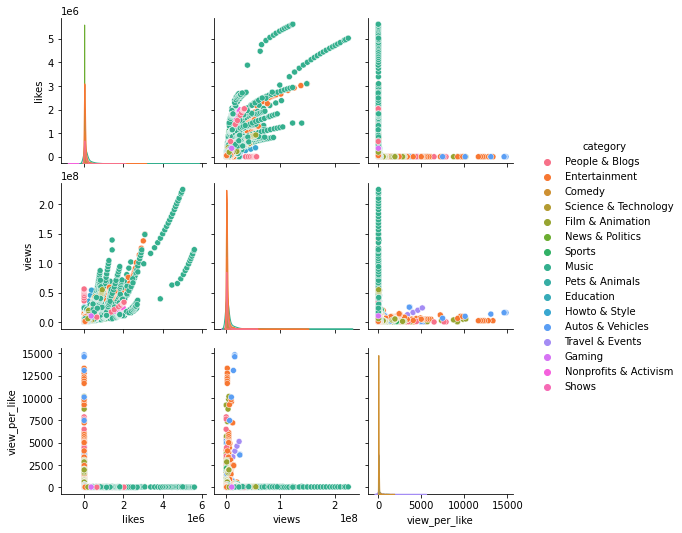

In [17]:
import seaborn as sns

sns.pairplot(cat_view_like, hue='category')

In [25]:
for i,row in cat_view_like.iterrows():
    if cat_view_like.at[i,'likes'] == 0:
        cat_view_like.at[i,'likes'] = 1
    cat_view_like.at[i,'view_per_like'] = cat_view_like.at[i,'views']/cat_view_like.at[i,'likes']

In [27]:
from scipy.stats import spearmanr

for category, cat_vals in cat_view_like.groupby('category'):
    log_likes = np.array(np.log(cat_vals['views']))
    views = np.array(cat_vals['likes'])
    corr, _ = spearmanr(log_likes, views)
    print("Correlation in: ", category, " : ", corr)

Correlation in:  Autos & Vehicles  :  0.7110249163287728
Correlation in:  Comedy  :  0.8614386947768155
Correlation in:  Education  :  0.8522696191513189
Correlation in:  Entertainment  :  0.8306897864130138
Correlation in:  Film & Animation  :  0.8496004759077421
Correlation in:  Gaming  :  0.9265330228167135
Correlation in:  Howto & Style  :  0.9223000170894963
Correlation in:  Music  :  0.9294255346752004
Correlation in:  News & Politics  :  0.9059831139514938
Correlation in:  Nonprofits & Activism  :  0.982414084823586
Correlation in:  People & Blogs  :  0.8546277286124683
Correlation in:  Pets & Animals  :  0.8674769406163918
Correlation in:  Science & Technology  :  0.8728174011281229
Correlation in:  Shows  :  0.8785973554576096
Correlation in:  Sports  :  0.8960614733785389
Correlation in:  Travel & Events  :  0.7363215302216196


In [39]:
for category, cat_vals in USvideo.groupby('category'):
    print("Category: ", category)
    disabled = cat_vals['comments_disabled'].value_counts().to_dict()
    if True not in disabled.keys():
        disabled[True] = 0
    print("Percentage disabled: ", disabled[True]/(disabled[True]+disabled[False]))

Category:  Autos & Vehicles
Percentage disabled:  0.013020833333333334
Category:  Comedy
Percentage disabled:  0.0005785363031530228
Category:  Education
Percentage disabled:  0.004830917874396135
Category:  Entertainment
Percentage disabled:  0.019670814933761542
Category:  Film & Animation
Percentage disabled:  0.011940298507462687
Category:  Gaming
Percentage disabled:  0.009791921664626682
Category:  Howto & Style
Percentage disabled:  0.002653159671972986
Category:  Music
Percentage disabled:  0.0013906056860321385
Category:  News & Politics
Percentage disabled:  0.06996381182147166
Category:  Nonprofits & Activism
Percentage disabled:  0.07017543859649122
Category:  People & Blogs
Percentage disabled:  0.020560747663551402
Category:  Pets & Animals
Percentage disabled:  0.004347826086956522
Category:  Science & Technology
Percentage disabled:  0.037484381507705125
Category:  Shows
Percentage disabled:  0.0
Category:  Sports
Percentage disabled:  0.012879484820607176
Category:  Tr

In [46]:
videos_per_day = []

for category, cat_vals in USvideo.groupby('trending_date'):
    videos_per_day.append(cat_vals.shape)
    
print("Mean: ", np.mean(videos_per_day))
print("Median: ", np.median(videos_per_day))
print("Stdev: ", np.std(videos_per_day))

Mean:  108.87560975609756
Median:  107.0
Stdev:  90.8769022157749


In [47]:
print(USvideo['category'].value_counts())

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category, dtype: int64


In [55]:
print(USvideo.at[0, 'publish_time'][11:-5])

17:13:01.000Z


In [ ]:
for i, row in USvideo.iterrows():
